# EDA and Visualization

Lets look at the difference between the categorical columns and numerical columns against the churned and existing customers

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('BankChurning_Updated.csv')

In [5]:
#Created a function in order to graph seperate bar graphs of the categorical columns
def Categortical_graphs(column_from_df):
    fig, axes = plt.subplots(1, 2,figsize=(16,5))
    temp = dfa[column_from_df].value_counts()
    df_1 = pd.DataFrame({'labels': temp.index,'values': temp.values})
    sns.barplot(ax=axes[0], x="labels",y="values",data=df_1)
    axes[0].set_title(f'{column_from_df} for Attrited Customers')
    axes[0].set_xlabel(column_from_df)
    axes[0].tick_params(labelrotation=90)
    axes[0].set_ylabel('Attrited Customers')
    temp_1 = dfe[column_from_df].value_counts()
    df_2 = pd.DataFrame({'labels': temp_1.index,'values': temp_1.values})
    sns.barplot(ax=axes[1], x="labels",y="values",data=df_2)
    axes[1].set_title(f'{column_from_df} for Existing Customers')
    axes[1].set_xlabel(column_from_df)
    axes[1].tick_params(labelrotation=90)
    axes[1].set_ylabel('Existing Customers')
    plt.show()

#Created a function in order to graph seperate histograms of the numerical columns
def Numerical_graphs(column_from_df):
    fig, axes = plt.subplots(1, 2,figsize=(16,5))
    sns.histplot(ax=axes[0],x=dfa[column_from_df],bins='auto',hue=dfa['Gender'])
    axes[0].set_title(f'{column_from_df} for Attrited Customers')
    axes[0].set_xlabel(column_from_df)
    axes[0].tick_params(labelrotation=90)
    axes[0].set_ylabel('Attrited Customers')
    sns.histplot(ax=axes[1],x=dfe[column_from_df],bins='auto',hue=dfe['Gender'])
    axes[1].set_title(f'{column_from_df} for Existing Customers')
    axes[1].set_xlabel(column_from_df)
    axes[1].tick_params(labelrotation=90)
    axes[1].set_ylabel('Existing Customers')
    plt.show()

In [6]:
#Seperated the data frames for each type of Churned Customer
dfe = df[df['Attrition_Flag'] == 'Existing Customer']
dfe = dfe.set_index('Attrition_Flag')
dfa = df[df['Attrition_Flag'] == 'Attrited Customer']
dfa = dfa.set_index('Attrition_Flag')

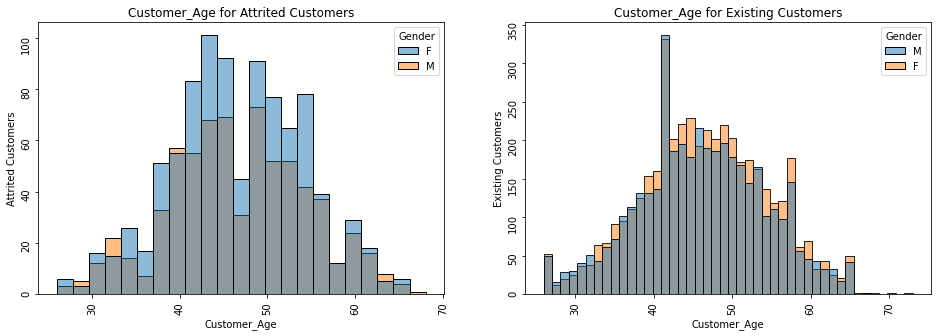

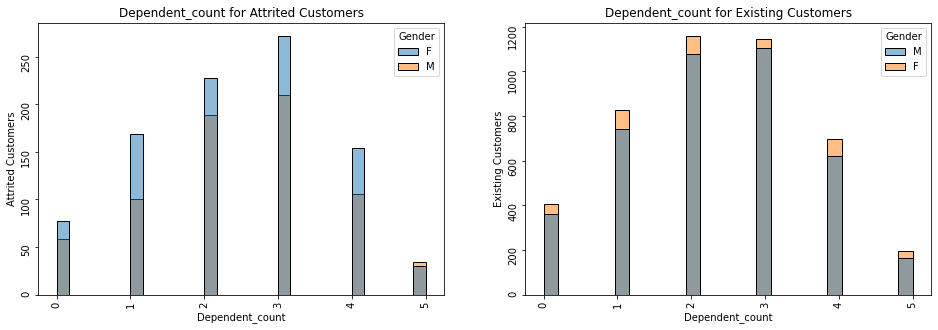

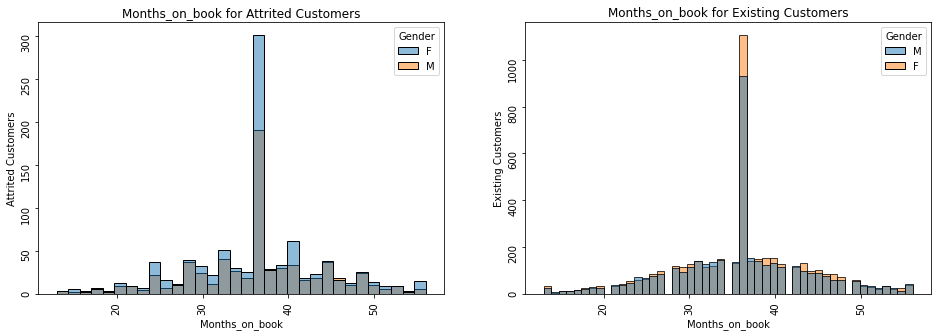

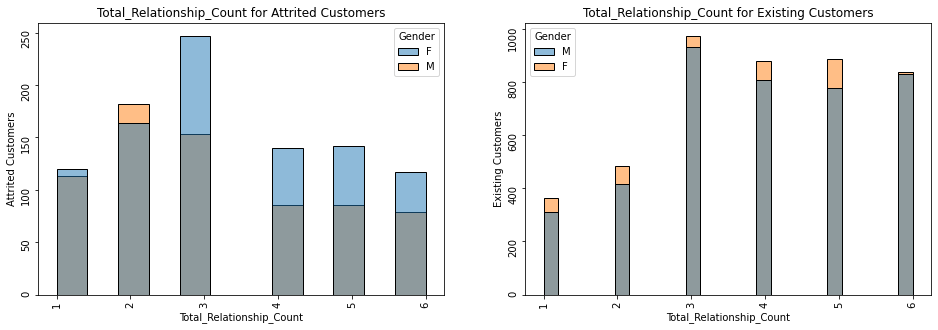

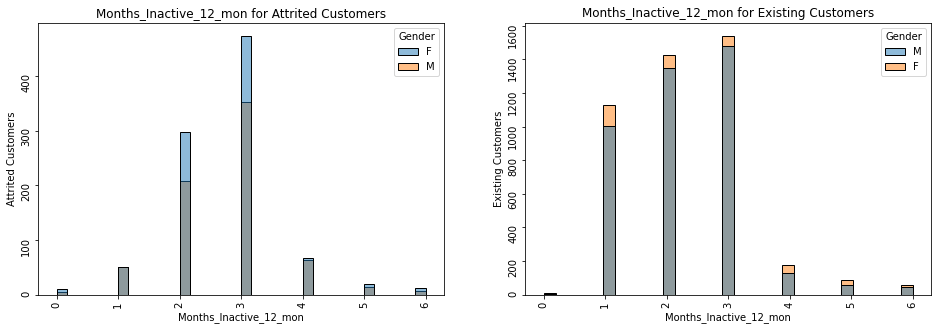

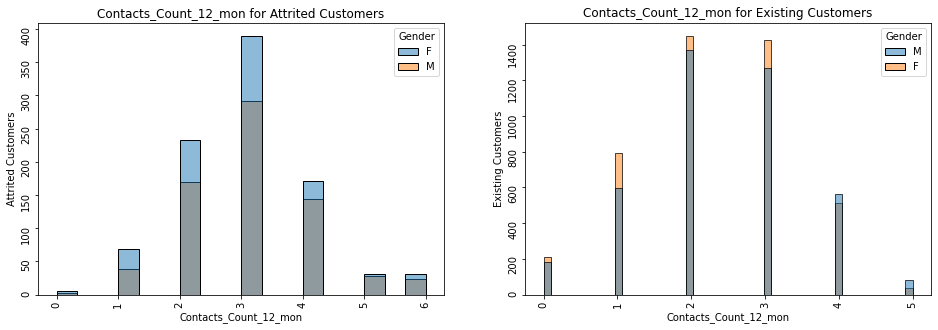

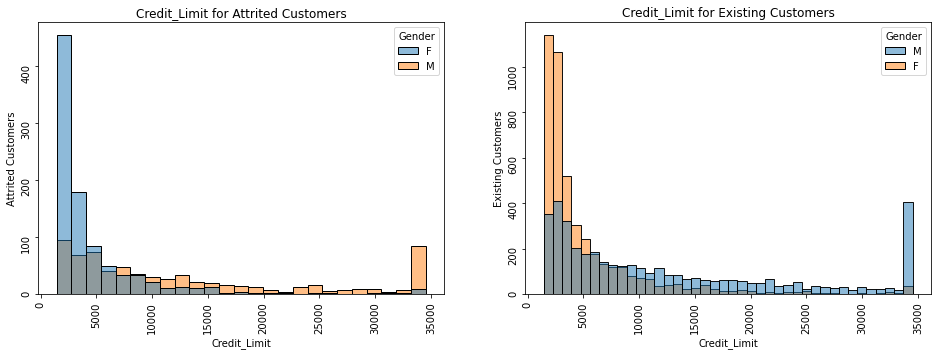

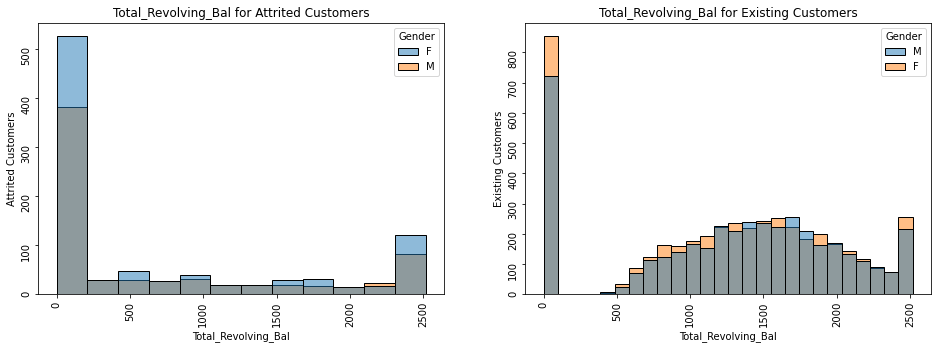

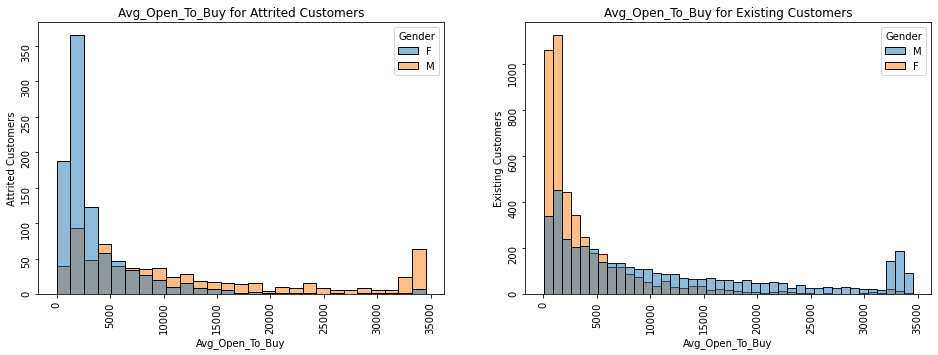

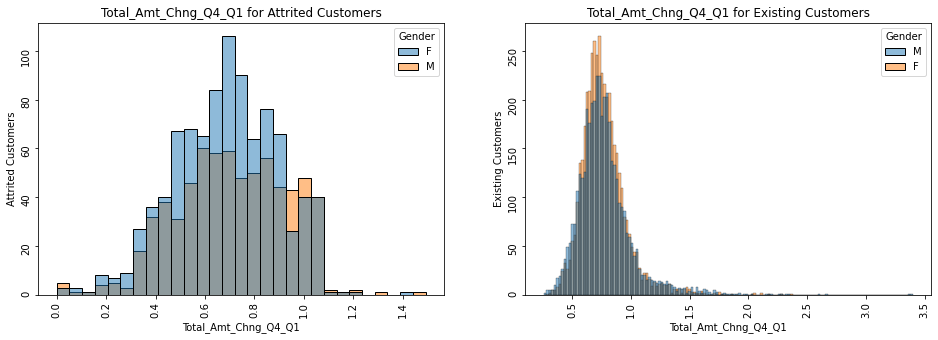

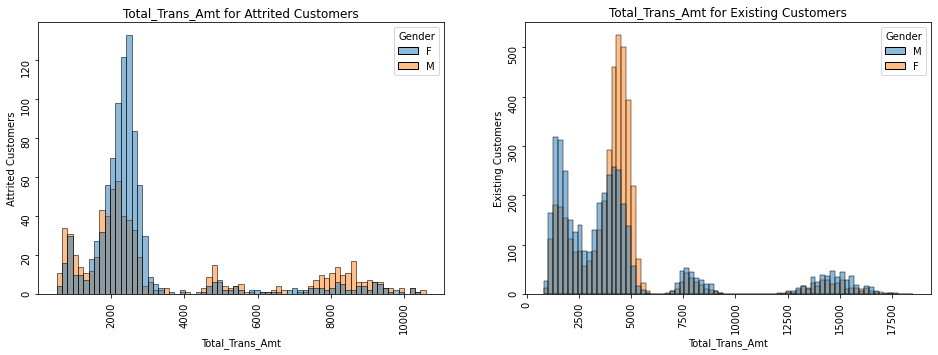

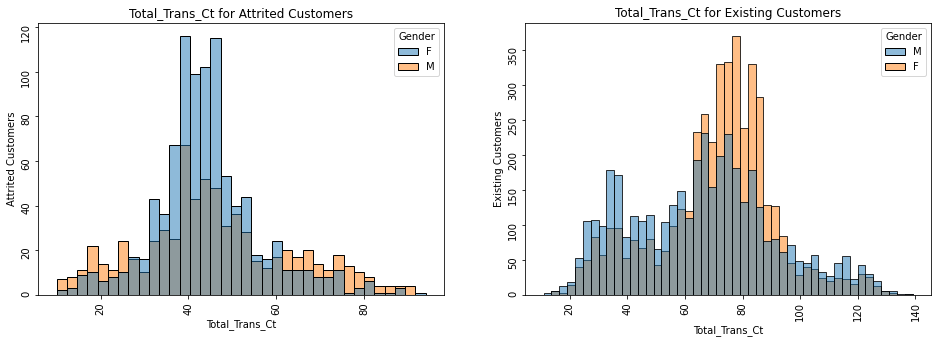

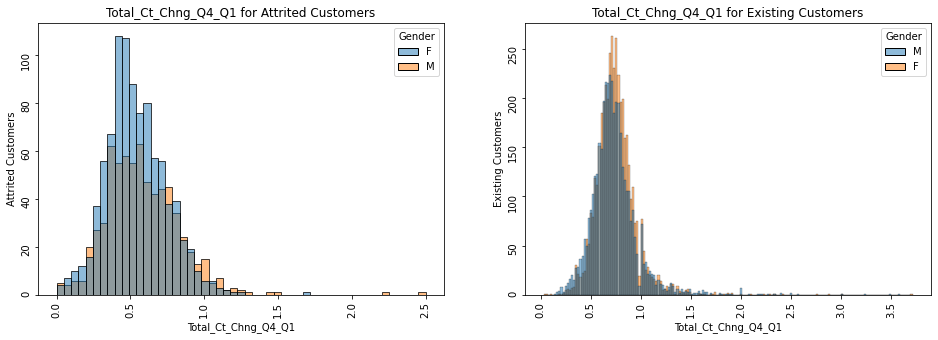

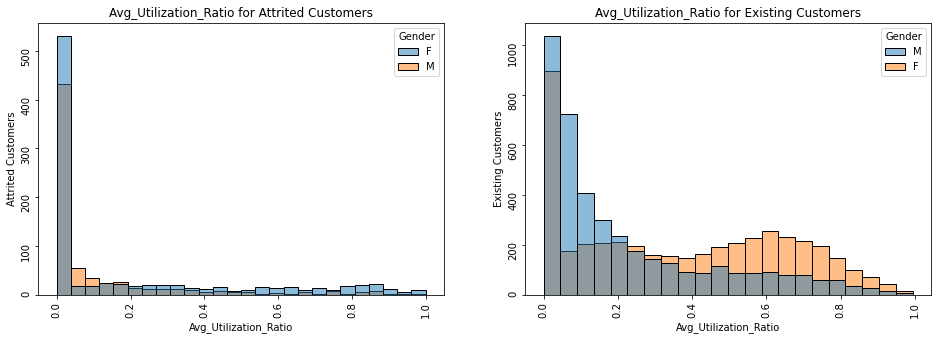

In [7]:
#Using a for loop to graph each numerical column
for col in df.columns:
    if df[col].dtype != 'object':
        Numerical_graphs(col)

In [8]:
#Setting the target variable to 1 and 0 
df.Attrition_Flag = df.Attrition_Flag.map({'Existing Customer':0,'Attrited Customer':1})

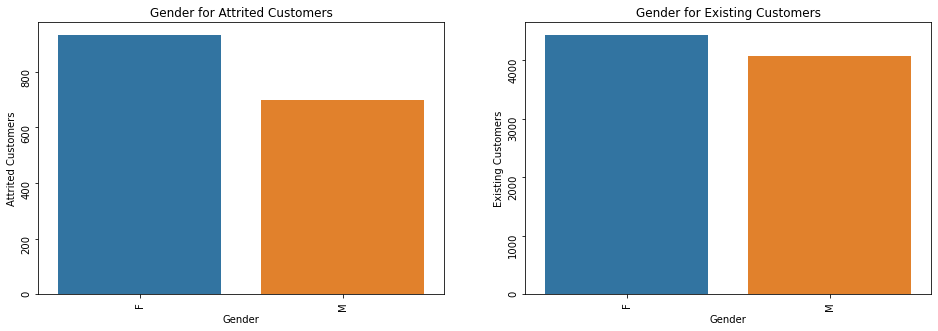

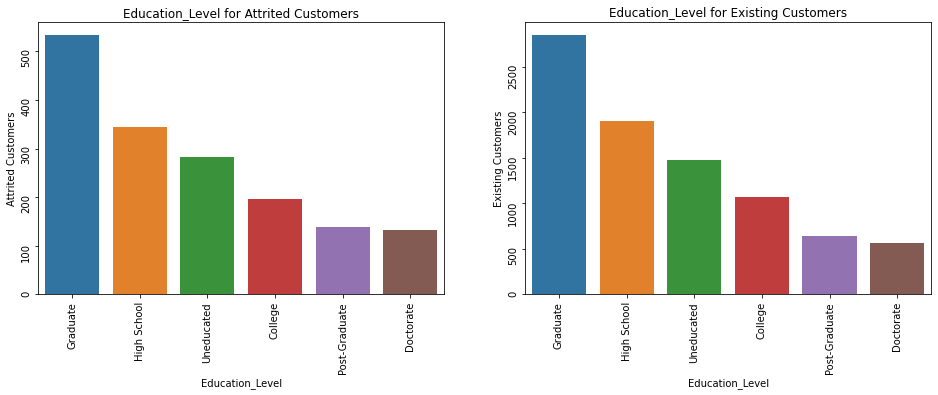

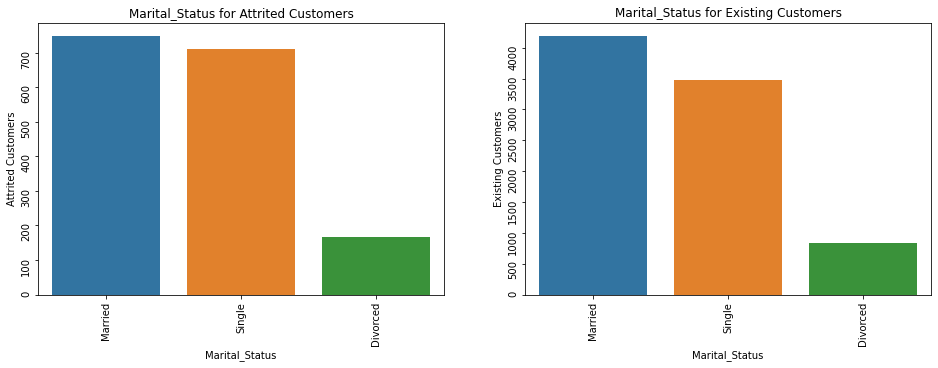

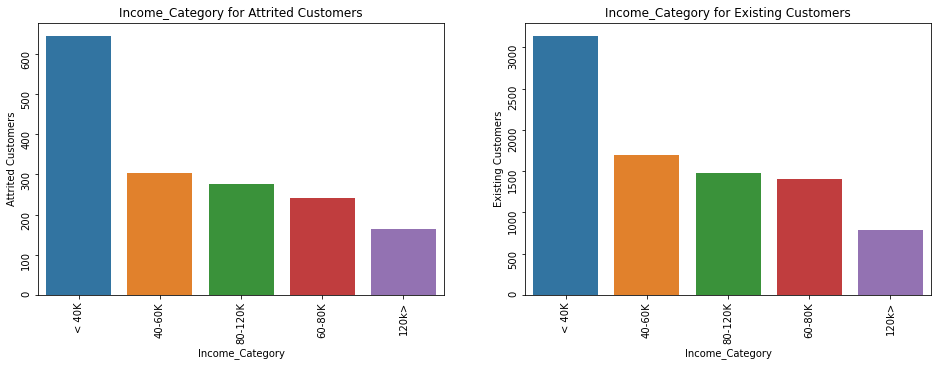

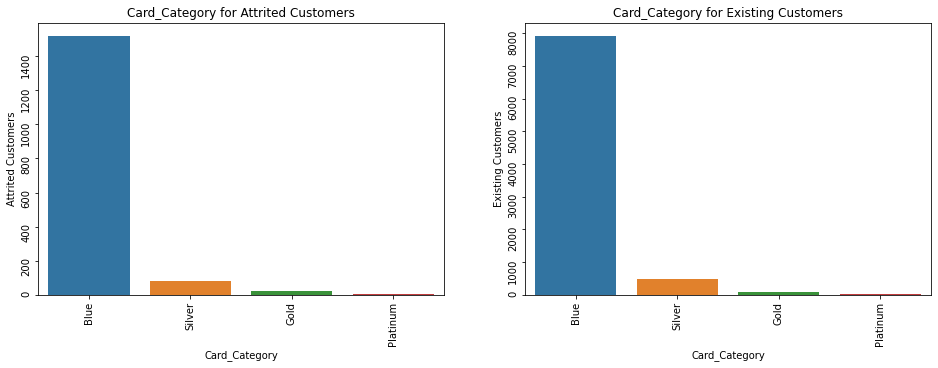

In [9]:
#For loop for graphing all the categortical columns
for col in df.columns:
    if df[col].dtype == 'object':
        Categortical_graphs(col)

In [10]:
#Mapping all the categorical columns for modeling
df.Gender = df.Gender.map({'M':0,'F':1})

df.Education_Level = df.Education_Level.map({'High School':2, 'Graduate':4, 'Uneducated':1,'College':3,
       'Post-Graduate':5, 'Doctorate':6})

df.Marital_Status = df.Marital_Status.map({'Married':2, 'Single':1,'Divorced':3})

df.Income_Category = df.Income_Category.map({'60-80K':3, '< 40K':1, '80-120K':4, '40-60K':2,'120k>':5})

df.Card_Category = df.Card_Category.map({'Blue':0, 'Gold':2, 'Silver':1, 'Platinum':3})

All the data has now been changed to numerical data, the data modelling can being.

Lets see if the dataset for the target is imbalanced. If so I may have to oversample or undersample the data, if I need to, I will check which method will be better for finding bank churners.

In [12]:
#Checking too see how imbalanced the dataset is
df.Attrition_Flag.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

As seen above, the target is imbalance. So i will be testing to see if under sampling or oversampling is better.

In [15]:
#Saving df to another csv file for ML
df.to_csv('Bank_Churned.csv',index=False)